# Installing and Importing Pyforest

In [1]:
# !pip install pyforest

In [1]:
# Import pyforest 
import pyforest

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>

In [2]:
# Checking all the packlages that were imported with pyfores
lazy_imports()

['import plotly.graph_objs as go',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn import svm',
 'import re',
 'import os',
 'import pandas as pd',
 'import pydot',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import train_test_split',
 'import keras',
 'import tensorflow as tf',
 'import datetime as dt',
 'from sklearn.linear_model import LinearRegression',
 'import xgboost as xgb',
 'import numpy as np',
 'import plotly.express as px',
 'import statistics',
 'import spacy',
 'import glob',
 'import bokeh',
 'import matplotlib as mpl',
 'import pickle',
 'import sys',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import altair as alt',
 'import tqdm',
 'import matplotlib.pyplot as plt',
 'import nltk',
 'from pyspark import SparkContext',
 'from sklearn.ensemble import RandomForestClassifier',
 'import gensim',
 'import dash',
 'import plotly as py',
 'from sklearn.linear_model import LogisticRegression',
 'from dask import da

# Importing train and test data set

In [3]:
# importing .csv files using Pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Checking the top 10 rows
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
# Checking the name of the columns
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Data Cleaning

In [7]:
# Checking Embarked categories
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
# Turn Sex column into numerical values
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 2)

In [9]:
# Checking Min and Max values
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

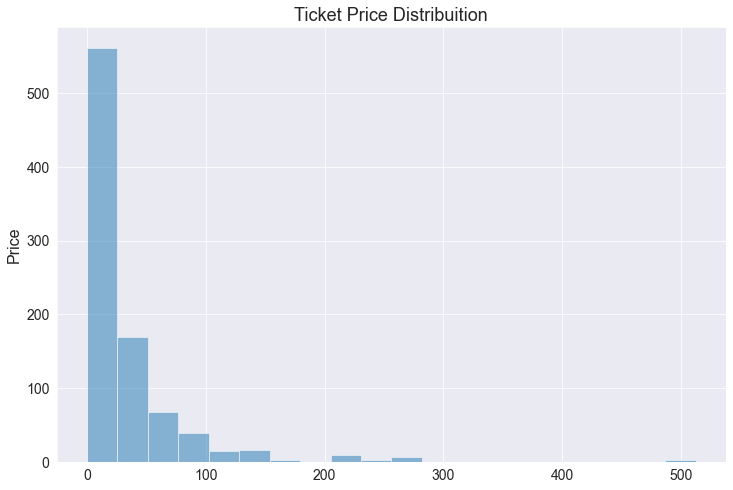

In [10]:
# Plotting fare price
train.Fare.plot.hist(bins=20, alpha=0.5,figsize=(12,8))
plt.title('Ticket Price Distribuition', fontsize=18)
plt.ylabel('Number of Tickets', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig()
plt.show()

In [11]:
# Initial lambda function
train['fare_category'] = train['Fare'].apply(lambda x: 1 if x > 200 else 0)

In [12]:
# Checking if it worked
train['fare_category'].value_counts()

0    871
1     20
Name: fare_category, dtype: int64

In [83]:
# Partial Lambda function
train['fare_category'] = train['Fare'].apply(lambda x: 1 if x >= 200 
                                             else 2 if x > 100 and x <= 200
                                             else 0)

In [88]:
# Checking id it worked
train['fare_category'].value_counts()

4    730
3    108
2     33
1     20
Name: fare_category, dtype: int64

In [85]:
# Complete lambda function
train['fare_category'] = train['Fare'].apply(lambda x: 1 if x >= 200 
                                             else 2 if x >= 100 and x < 200
                                             else 3 if x >= 50 and x < 100
                                             else 4)

In [86]:
train['fare_category'].value_counts()

4    730
3    108
2     33
1     20
Name: fare_category, dtype: int64

In [92]:
# Created categorical values for Embarked feature
train['Embarked'] = train['Embarked'].apply(lambda x: 0 if x == 'nan' 
                                            else 1 if x == 'S' 
                                            else 2 if x == 'C' 
                                            else 3)

In [32]:
train.drop(columns=['Name','Ticket','Cabin', 'PassengerId', 'Parch', 'Embarked'], inplace=True)

In [33]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [34]:
train.dropna(inplace=True)

# Checking if Matplotlib and Seaborn was correctly imported

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

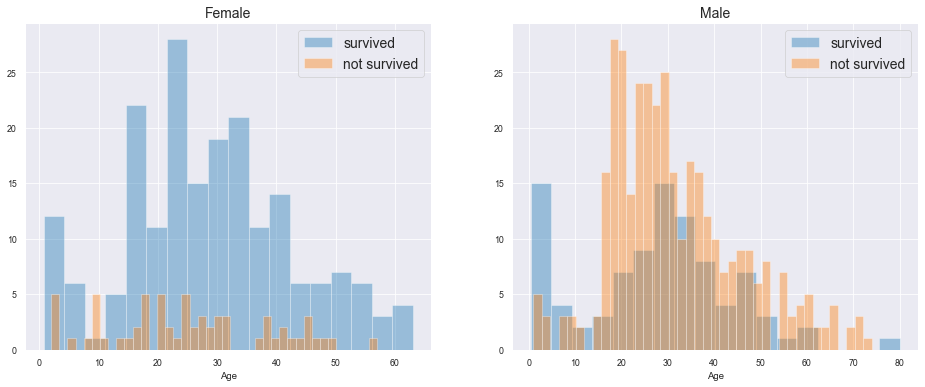

In [93]:
# checking the age and sex
survived = 'survived'
not_survived = 'not survived'

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
women = train[train['Sex']==2]
men = train[train['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend(fontsize=14)
ax.set_title('Female', fontsize=14)
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend(fontsize=14)
_ = ax.set_title('Male', fontsize=14)
plt.show()

In [36]:
# Making sure there is not any NaN values
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [37]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train Test Split

In [38]:
X = train.drop(['Survived'], axis=1)
y = train.Survived

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<IPython.core.display.Javascript object>

# Modeling

In [40]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [41]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:05<00:00,  5.85it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.81,0.79,0.79,0.81,0.04
ExtraTreeClassifier,0.79,0.78,0.78,0.79,0.02
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.13
LGBMClassifier,0.79,0.77,0.77,0.78,0.16
QuadraticDiscriminantAnalysis,0.79,0.77,0.77,0.78,0.02
GaussianNB,0.78,0.77,0.77,0.78,0.02
RandomForestClassifier,0.78,0.76,0.76,0.78,0.21
BernoulliNB,0.77,0.76,0.76,0.77,0.02
KNeighborsClassifier,0.77,0.76,0.76,0.77,0.04


In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<IPython.core.display.Javascript object>

In [21]:
print('Evaluation Metrics – Random Forest:')
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred, average='macro')))

Evaluation Metrics – Random Forest:
Accuracy: 0.776536312849162
F1 Score: 0.7653997378768022


In [22]:
rf = LogisticRegression()
rf.fit(X_train, y_train)
y_pred_lr = rf.predict(X_test)

<IPython.core.display.Javascript object>

In [24]:
print('Evaluation Metrics – Logistic Regression:')
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred_lr, average='macro')))

Evaluation Metrics – Logistic Regression:
Accuracy: 0.770949720670391
F1 Score: 0.7562198970270719
